In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

butaritari ki
bredasdorp za
barentsburg sj
malindi ke
kununurra au
saint-philippe re
souillac mu
butaritari ki
albany au
atuona pf
roma au
punta arenas cl
hobart au
punta arenas cl
saint george bm
deputatskiy ru
signagi ge
vaini to
taolanaro mg
lavrentiya ru
albany au
sao filipe cv
bredasdorp za
rikitea pf
jamestown sh
khatanga ru
alice springs au
rikitea pf
ayan ru
east london za
arraial do cabo br
victoria sc
yanan cn
ushuaia ar
rikitea pf
busselton au
mahon es
severo-kurilsk ru
cidreira br
punta arenas cl
jamestown sh
georgetown sh
punta arenas cl
vardo no
rikitea pf
severodvinsk ru
taoudenni ml
saldanha za
illoqqortoormiut gl
jamestown sh
cape town za
ushuaia ar
hermanus za
belushya guba ru
ushuaia ar
ushuaia ar
cidreira br
tasiilaq gl
la ronge ca
fort nelson ca
pevek ru
bredasdorp za
jamestown sh
norman wells ca
gangotri in
yulara au
basco ph
memaliaj al
port alfred za
yellowknife ca
teahupoo pf
todos santos mx
longyearbyen sj
attawapiskat ca
coquimbo cl
albany au
busselton au
bel

hofn is
lebu cl
iqaluit ca
carnarvon au
san patricio mx
kodiak us
gayny ru
mataura pf
portobelo pa
jamestown sh
ribeira grande pt
tuktoyaktuk ca
male mv
monchegorsk ru
rio gallegos ar
attawapiskat ca
saint-denis re
cockburn town tc
yellowknife ca
zalakomar hu
albany au
rikitea pf
kavieng pg
cherskiy ru
barentsburg sj
port alfred za
ribeira grande pt
amderma ru
flin flon ca
hermanus za
zyryanka ru
kodiak us
qostanay kz
la union es
butaritari ki
yerbogachen ru
tarnobrzeg pl
puerto ayora ec
kiama au
faanui pf
taolanaro mg
chesley ca
nhulunbuy au
henties bay na
tuktoyaktuk ca
ust-uda ru
kudahuvadhoo mv
ushuaia ar
yumen cn
yellowknife ca
arti ru
kodiak us
ituni gy
jamestown sh
kavaratti in
bahia blanca ar
falun se
grindavik is
qaanaaq gl
unecha ru
kapaa us
mahebourg mu
busselton au
esperance au
nuwara eliya lk
ribeira grande pt
punta arenas cl
poronaysk ru
warqla dz
bredasdorp za
punta arenas cl
barentsburg sj
gandevi in
cascais pt
louisbourg ca
walvis bay na
pindiga ng
ushuaia ar
port hawk

raudeberg no
barra do corda br
herrin us
jamestown sh
hithadhoo mv
albany au
punta arenas cl
hermanus za
marysville us
yellowknife ca
santa cruz del sur cu
rikitea pf
tuktoyaktuk ca
iqaluit ca
nikolskoye ru
amderma ru
rikitea pf
ushuaia ar
busselton au
yellowknife ca
fenoarivo mg
taolanaro mg
sao filipe cv
zaranj af
busselton au
podgorenskiy ru
cape town za
rikitea pf
palabuhanratu id
provideniya ru
upernavik gl
khatanga ru
clyde river ca
mpulungu zm
nizhneyansk ru
ilulissat gl
mount isa au
dongsheng cn
jamestown sh
busselton au
samarai pg
mar del plata ar
kaitangata nz
ushuaia ar
chokurdakh ru
piacabucu br
chuy uy
ushuaia ar
victoria sc
ushuaia ar
taolanaro mg
yatou cn
hilo us
prince rupert ca
albany au
araouane ml
avarua ck
hermanus za
louisbourg ca
dabakala ci
bambous virieux mu
ushuaia ar
sorland no
ribeira grande pt
yamada jp
tuktoyaktuk ca
lolua tv
tidore id
punta arenas cl
severo-kurilsk ru
qaanaaq gl
cidreira br
avarua ck
cidreira br
mys shmidta ru
ngunguru nz
albany au
kapaa u

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 1 | malindi
Processing Record 5 of Set 1 | kununurra
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | souillac
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | roma
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | saint george
Processing Record 14 of Set 1 | deputatskiy
Processing Record 15 of Set 1 | signagi
City not found. Skipping...
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | lavrentiya
Processing Record 19 of Set 1 | sao filipe
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 |

Processing Record 38 of Set 4 | lasa
Processing Record 39 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 40 of Set 4 | hobyo
Processing Record 41 of Set 4 | cockburn town
Processing Record 42 of Set 4 | torbay
Processing Record 43 of Set 4 | tal
Processing Record 44 of Set 4 | wukari
Processing Record 45 of Set 4 | port-gentil
Processing Record 46 of Set 4 | saskylakh
Processing Record 47 of Set 4 | kimbe
Processing Record 48 of Set 4 | muroto
Processing Record 49 of Set 4 | kaeo
Processing Record 50 of Set 4 | manacapuru
Processing Record 1 of Set 5 | maldonado
Processing Record 2 of Set 5 | jinchang
Processing Record 3 of Set 5 | nanortalik
Processing Record 4 of Set 5 | artyk
City not found. Skipping...
Processing Record 5 of Set 5 | terre haute
Processing Record 6 of Set 5 | san carlos de bariloche
Processing Record 7 of Set 5 | koungou
Processing Record 8 of Set 5 | north platte
Processing Record 9 of Set 5 | dubenskiy
City not found. Skipping...
Processing 

Processing Record 29 of Set 8 | high level
Processing Record 30 of Set 8 | beloha
Processing Record 31 of Set 8 | dingle
Processing Record 32 of Set 8 | dawson creek
Processing Record 33 of Set 8 | narsaq
Processing Record 34 of Set 8 | meyungs
City not found. Skipping...
Processing Record 35 of Set 8 | saleaula
City not found. Skipping...
Processing Record 36 of Set 8 | praia
Processing Record 37 of Set 8 | fagersta
Processing Record 38 of Set 8 | nouadhibou
Processing Record 39 of Set 8 | fare
Processing Record 40 of Set 8 | mount gambier
Processing Record 41 of Set 8 | la asuncion
Processing Record 42 of Set 8 | salalah
Processing Record 43 of Set 8 | vestmannaeyjar
Processing Record 44 of Set 8 | sao gabriel
Processing Record 45 of Set 8 | tumbi
Processing Record 46 of Set 8 | comodoro rivadavia
Processing Record 47 of Set 8 | kashmor
Processing Record 48 of Set 8 | tymovskoye
Processing Record 49 of Set 8 | jaru
Processing Record 50 of Set 8 | karratha
Processing Record 1 of Set 9

Processing Record 12 of Set 12 | grimshaw
Processing Record 13 of Set 12 | raudeberg
Processing Record 14 of Set 12 | barra do corda
Processing Record 15 of Set 12 | herrin
Processing Record 16 of Set 12 | marysville
Processing Record 17 of Set 12 | santa cruz del sur
Processing Record 18 of Set 12 | fenoarivo
Processing Record 19 of Set 12 | zaranj
Processing Record 20 of Set 12 | podgorenskiy
Processing Record 21 of Set 12 | mpulungu
Processing Record 22 of Set 12 | mount isa
Processing Record 23 of Set 12 | dongsheng
Processing Record 24 of Set 12 | samarai
Processing Record 25 of Set 12 | piacabucu
Processing Record 26 of Set 12 | yatou
Processing Record 27 of Set 12 | prince rupert
Processing Record 28 of Set 12 | araouane
Processing Record 29 of Set 12 | dabakala
Processing Record 30 of Set 12 | yamada
Processing Record 31 of Set 12 | tidore
City not found. Skipping...
Processing Record 32 of Set 12 | ngunguru
Processing Record 33 of Set 12 | zhigalovo
Processing Record 34 of Set

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,84.04,77,100,16.26,KI,2021-07-16 16:31:47
1,Bredasdorp,-34.5322,20.0403,54.72,71,0,4.61,ZA,2021-07-16 16:31:47
2,Malindi,-3.2175,40.1191,76.37,79,28,20.29,KE,2021-07-16 16:31:48
3,Kununurra,-15.7667,128.7333,64.38,72,67,2.30,AU,2021-07-16 16:31:48
4,Saint-Philippe,-21.3585,55.7679,69.39,78,48,13.38,RE,2021-07-16 16:31:48
5,Souillac,-20.5167,57.5167,71.98,73,40,11.50,MU,2021-07-16 16:31:49
6,Albany,42.6001,-73.9662,87.46,65,61,1.99,US,2021-07-16 16:28:49
7,Atuona,-9.8000,-139.0333,77.77,70,10,22.35,PF,2021-07-16 16:31:49
8,Roma,43.2128,-75.4557,79.12,68,75,9.22,US,2021-07-16 16:31:49
9,Punta Arenas,-53.1500,-70.9167,37.51,87,75,8.05,CL,2021-07-16 16:31:50


In [9]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2021-07-16 16:31:47,3.0707,172.7902,84.04,77,100,16.26
1,Bredasdorp,ZA,2021-07-16 16:31:47,-34.5322,20.0403,54.72,71,0,4.61
2,Malindi,KE,2021-07-16 16:31:48,-3.2175,40.1191,76.37,79,28,20.29
3,Kununurra,AU,2021-07-16 16:31:48,-15.7667,128.7333,64.38,72,67,2.30
4,Saint-Philippe,RE,2021-07-16 16:31:48,-21.3585,55.7679,69.39,78,48,13.38
...,...,...,...,...,...,...,...,...,...
532,Zhigalovo,RU,2021-07-16 16:34:46,54.8097,105.1578,64.02,73,100,2.24
533,Liepaja,LV,2021-07-16 16:34:46,56.5419,21.0367,78.85,73,9,5.75
534,Mansa,IN,2021-07-16 16:34:46,29.9833,75.3833,94.89,46,46,5.64
535,College,US,2021-07-16 16:34:47,64.8569,-147.8028,61.29,67,75,0.00


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

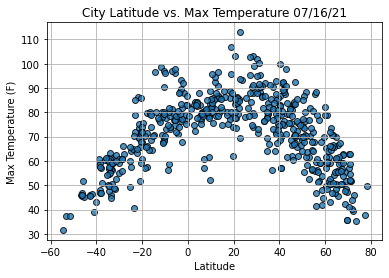

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

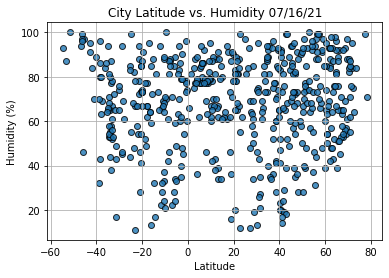

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

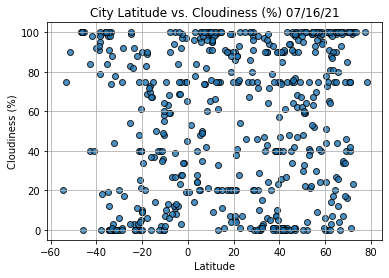

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

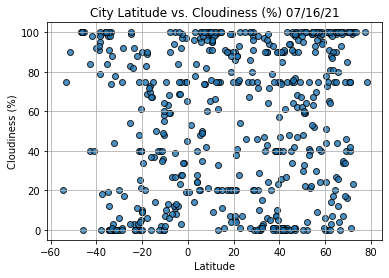

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

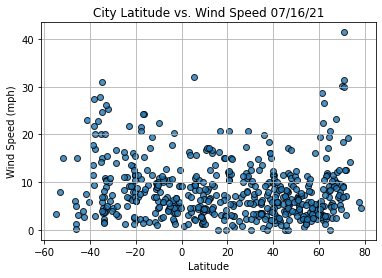

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()